In [1]:
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [3]:
from keras.layers import Dropout,Flatten
from keras.utils import np_utils

In [ ]:
np.random.seed(10)


In [4]:
# Loading the data set using pandas as data frame format 
import pandas as pd


In [5]:
concrete = pd.read_csv("C:/Users/anjum/Documents/Exelir workshop/Dataset/concrete.csv")

In [ ]:
concrete.describe()

In [ ]:
concrete.info()

In [ ]:
concrete.head()

In [8]:
#Preparing the Training and Testing Data Sets
predictors = concrete.iloc[:,0:8].values


In [9]:
outcomes = concrete.iloc[:,8].values

In [11]:
from sklearn import preprocessing


In [12]:
#one hot

min_max_scaler = preprocessing.MinMaxScaler()
predictors_scaled = min_max_scaler.fit_transform(predictors)
predictors_scaled[:5,]

array([[0.08972603, 0.58987201, 0.        , 0.65255591, 0.        ,
        0.49651163, 0.38760662, 0.07417582],
       [0.15273973, 0.11741792, 0.62118941, 0.29153355, 0.33540373,
        0.81337209, 0.50727546, 0.03571429],
       [0.33789954, 0.        , 0.47826087, 0.52396166, 0.17080745,
        0.45319767, 0.67034621, 0.07417582],
       [0.37442922, 0.31719533, 0.        , 0.84824281, 0.        ,
        0.38081395, 0.19066734, 0.07417582],
       [0.12054795, 0.51029494, 0.        , 0.57108626, 0.2826087 ,
        0.71627907, 0.25765178, 0.07417582]])

In [14]:
from sklearn import model_selection

In [15]:
#Finally, we split the data into a training set and a testing set. These will in turn be used to train and evaluate the regression model respectively.

X_train, X_test, y_train, y_test = model_selection.train_test_split(predictors, outcomes, test_size=0.33, random_state=22)
print('X_train {0}, y_train {1}'.format(X_train.shape, y_train.shape))
print('X_test {0}, y_test {1}'.format(X_test.shape, y_test.shape))

X_train (690, 8), y_train (690,)
X_test (340, 8), y_test (340,)


In [17]:
from keras import models, layers, metrics


In [18]:
network = models.Sequential()
network.add(layers.Dense(10, activation='relu', input_shape=(X_train.shape[1], )))
network.add(layers.Dense(5, activation='relu'))
network.add(layers.Dense(1))
network.compile(optimizer='adam',
                loss='mean_squared_error')

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [21]:
import matplotlib.pyplot as plt


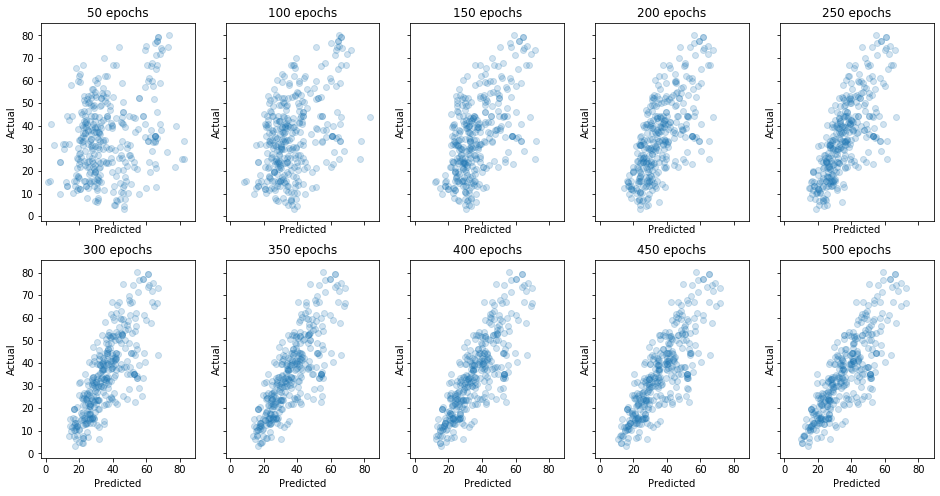

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(16,8), sharex=True, sharey=True)
losses = []
for i in range(2):
    for j in range(5):
        network.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0);
        pred_loss = network.evaluate(X_test, y_test, verbose=0)
        losses.append(pred_loss)
        preds = network.predict(X_test)
        axes[i,j].scatter(preds, y_test, alpha=0.2)
        axes[i,j].set_title('{0} epochs'.format((5*i+j+1)*50))
        axes[i,j].set_ylabel('Actual')
        axes[i,j].set_xlabel('Predicted')

Mean squared error: 123.11


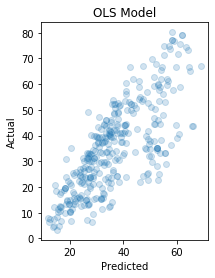

In [24]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
ols_y_pred = regr.predict(X_test)

fig, ax = plt.subplots(1, 1, figsize=(3,4))
ax.scatter(ols_y_pred, y_test, alpha=0.2)
ax.set_title('OLS Model'.format((5*i+j+1)*50))
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

print("Mean squared error: {0:.2f}".format(mean_squared_error(y_test, ols_y_pred)))

In [ ]:
#Without any tuning the simple neural network achieves the best mean-squared error. 
#The other models, even after tuning, cannot get below a mean-squared error of 100. Clearly,
#this is a highly non-linear problem. 